## Hadoop mapreduce 

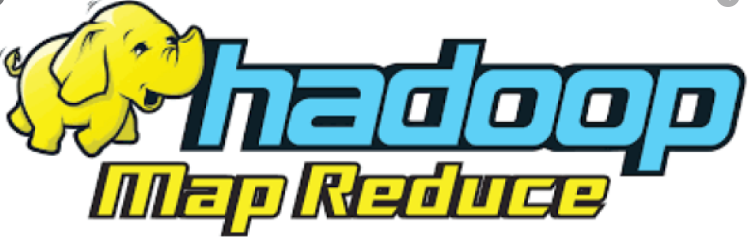

##### What is mapreduce??

MapReduce is a processing technique and a program model for distributed computing based on java. The MapReduce algorithm contains two important tasks, namely Map and Reduce. Map takes a set of data and converts it into another set of data, where individual elements are broken down into tuples (key/value pairs). Secondly, reduce task, which takes the output from a map as an input and combines those data tuples into a smaller set of tuples. As the sequence of the name MapReduce implies, the reduce task is always performed after the map job.

The major advantage of MapReduce is that it is easy to scale data processing over multiple computing nodes. Under the MapReduce model, the data processing primitives are called mappers and reducers. Decomposing a data processing application into mappers and reducers is sometimes nontrivial. But, once we write an application in the MapReduce form, scaling the application to run over hundreds, thousands, or even tens of thousands of machines in a cluster is merely a configuration change. This simple scalability is what has attracted many programmers to use the MapReduce model.

### Overview

Generally MapReduce paradigm is based on sending the computer to where the data resides!

MapReduce program executes in three stages, namely map stage, shuffle stage, and reduce stage.

Map stage − The map or mapper’s job is to process the input data. Generally the input data is in the form of file or directory and is stored in the Hadoop file system (HDFS). The input file is passed to the mapper function line by line. The mapper processes the data and creates several small chunks of data.

Reduce stage − This stage is the combination of the Shuffle stage and the Reduce stage. The Reducer’s job is to process the data that comes from the mapper. After processing, it produces a new set of output, which will be stored in the HDFS.

During a MapReduce job, Hadoop sends the Map and Reduce tasks to the appropriate servers in the cluster.

The framework manages all the details of data-passing such as issuing tasks, verifying task completion, and copying data around the cluster between the nodes.

Most of the computing takes place on nodes with data on local disks that reduces the network traffic.

After completion of the given tasks, the cluster collects and reduces the data to form an appropriate result, and sends it back to the Hadoop server.



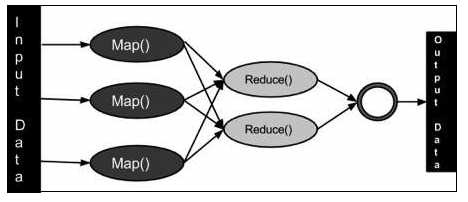

### Mapping and Reducing

A mapper class handles the mapping phase; it maps the data present in different datanodes. A reducer class handles the reducing phase; it aggregates and reduces the output of different datanodes to generate the final output.

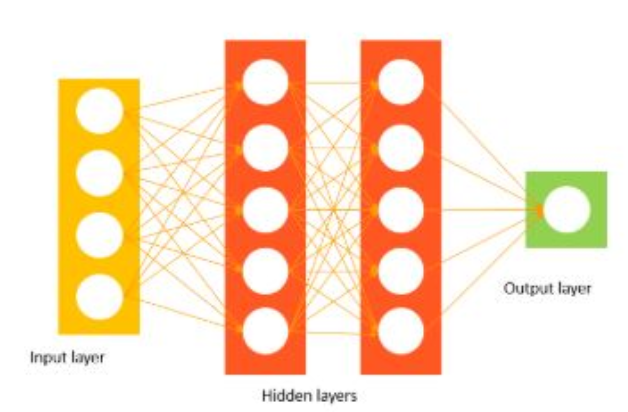

Data that is stored on multiple machines pass through mapping. The final output is obtained after the data is shuffled, sorted, and reduced. 

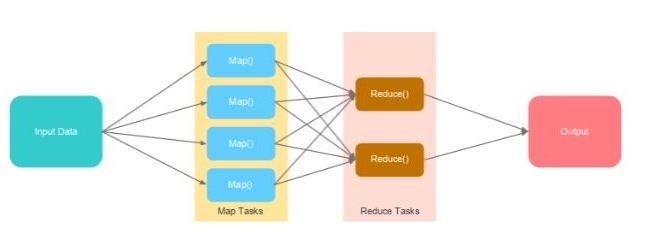

**Input Data**
Hadoop accepts data in various formats and stores it in HDFS. This input data is worked upon by multiple map tasks. 

**Map Tasks**
Map reads the data, processes it, and generates key-value pairs. The number of map tasks depends upon the input file and its format. 

Typically, a file in a Hadoop cluster is broken down into blocks, each with a default size of 128 MB. Depending upon the size, the input file is split into multiple chunks. A map task then runs for each chunk. The mapper class has mapper functions that decide what operation is to be performed on each chunk. 

**Reduce Tasks**
In the reducing phase, a reducer class performs operations on the data generated from the map tasks through a reducer function. It shuffles, sorts, and aggregates the intermediate key-value pairs (tuples) into a set of smaller tuples. 

**Output** 
The smaller set of tuples is the final output and gets stored in HDFS.

## Workflow

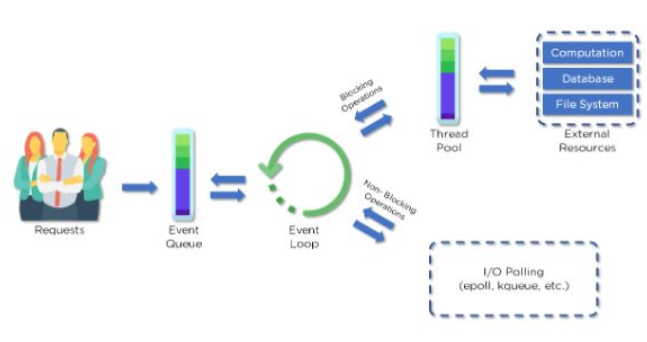

The input data that needs to be processed using MapReduce is stored in HDFS. The processing can be done on a single file or a directory that has multiple files.

The input format defines the input specification and how the input files would be split and read.

The input split logically represents the data to be processed by an individual mapper. 

RecordReader communicates with the input split and converts the data into key-value pairs suitable to be read by the mapper.

 
The mapper works on the key-value pairs and gives an intermittent output, which goes for further processing.

Combiner is a mini reducer that performs mini aggregation on the key-value pairs generated by the mapper.

Partitioner decides how outputs from combiners are sent to the reducers. 

The output of the partitioner is shuffled and sorted. This output is fed as input to the reducer. 

The reducer combines all the intermediate values for the intermediate keys into a list called tuples. 

The RecordWriter writes these output key-value pairs from reducer to the output files. 

The output data gets stored in HDFS.

## Architecture

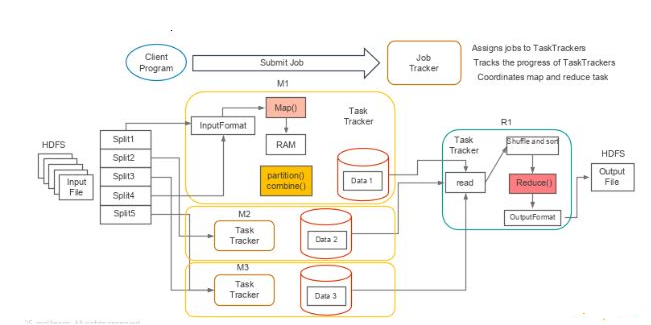

There is a client program or an API which intends to process the data. It submits the job to the job tracker (resource manager in the case of Hadoop YARN framework).

Hadoop v1 had a job tracker as master, leading the Task Trackers. In Hadoop v2: 

Job tracker was replaced with ResourceManager 
Task tracker was replaced with NodeManager 
The ResourceManager has to assign the job to the NodeManagers, which then handles the processing on every node. Once an application to be run on the YARN processing framework is submitted, it is handled by the ResourceManager. 

The data which is stored in HDFS are broken down into one or multiple splits depending on the input format. One or numerous map tasks, running within the container on the nodes, work on these input splits. 

There is some amount of RAM utilized for each map task. The same data, which then goes through the reducing phase, would also use some RAM and CPU cores. Internally, there are functions which take care of deciding the number of reducers, doing a mini reduce, reading and processing the data from multiple data nodes.

This is how the MapReduce programming model makes parallel processing work. Finally, the output is generated and gets stored in HDFS.

## Use cases

**Drug Trials**

Mathematicians and data scientists have traditionally worked together in the pharmaceutical industry. The invention of MapReduce and the dissemination of data science algorithms in big data systems means ordinary IT departments can now tackle problems that would have required the work of Ph.D. scientists and supercomputers in the past.

Let’s take, for example, a company that conducts drug trials to show whether its new drug works against certain illnesses, which is a problem that fits perfectly into the MapReduce model. In this case, we want to run a regression model against a set of patients who have been given the new drug and calculate how effective the drug is in combating the disease.  

Suppose the drug is used for cancer patients. We have data points like this:

{ (patient name: John, DateTime: 3/01/2016 14:00, dosage: 10 mg, size of cancer tumor: 1 mm) }

The first step here is to calculate the change in the size of the tumor from one dateTime to next. Different patients would be taking different amounts of the drug, so we would want to know what amount of the drug works best. Using MapReduce, we would try to reduce this problem to some linear relationship like this:

percent reduction in tumor = x (quantity of drug) + y (period of time) + constant value

If some correlation exists between the drug and the reduction in the tumor, then the drug can be said to work. The model would also show to what degree it works by calculating the error statistic.